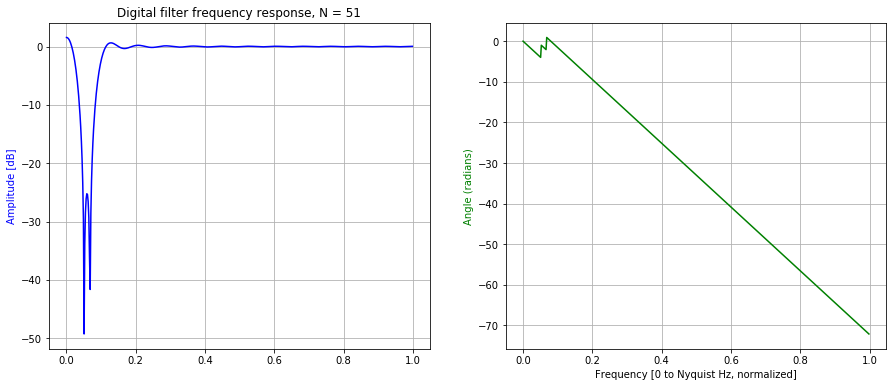

In [5]:
# LAB2 for ECE420 

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Generate an FIR filter using scipy.signal.firls().
# Sample code start you off and display the frequency response is given below.

# Your filter design here
# firls() can be called via signal.firls()

fs = 48000
Nyqr = fs/2
N = 51
stop_l1, stop_r1, stop_l2, stop_r2 = 700, 1000, 2000, 2300
band = [0, stop_l1, stop_r1, stop_l2, stop_r2, Nyqr]
desired = [1, 1, 0, 0, 1, 1]

b = signal.firls(N, band, desired, nyq =Nyqr)

# Signal analysis
w, h = signal.freqz(b)

plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)
plt.title('Digital filter frequency response, N = ' + str(len(b)))
plt.plot(w / np.pi, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.grid()
plt.axis('tight')

plt.subplot(1, 2, 2)
angles = np.unwrap(np.angle(h))
plt.plot(w / np.pi, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.xlabel('Frequency [0 to Nyquist Hz, normalized]')
plt.show()

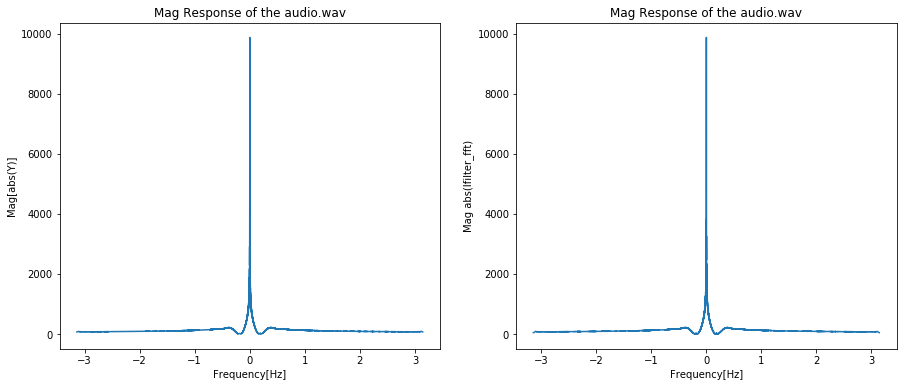

In [13]:
'''
Implement the filter designed in Part 1. 
Test your filter on the time_domain signal test_data given below and plot the time domain result.

Show your TA when you are done. 
Compare your results with lfilt and save the figure of your filtered results.
'''
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal 

F_s = 48000
t = [i / F_s for i in range(2 * F_s)]
b = signal.firls(N, band, desired, nyq =Nyqr)

test_data = signal.chirp(t, 1, t[-1], 24000, method='logarithmic')

# ... filter ...

y = np.convolve(test_data, b)
y_fft = np.fft.fftshift(np.fft.fft(y))
x_axis = np.linspace(-np.pi, np.pi, len(y_fft))

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Mag Response of the audio.wav')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Mag[abs(Y)]')
plt.plot(x_axis,np.absolute(y_fft))

lfilter_result = signal.lfilter(b,1,test_data)
lfilter_fft = np.fft.fftshift(np.fft.fft(lfilter_result))
x_axis = np.linspace(-np.pi,np.pi,len(lfilter_fft))
plt.subplot(122)
plt.title('Mag Response of the audio.wav')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Mag abs(lfilter_fft)')
plt.plot(x_axis,np.absolute(lfilter_fft))